<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 10px; display: inline" alt="INSA"/></a> 
<a href="https://gei.insa-toulouse.fr/fr/index.html" ><img src="https://gei.insa-toulouse.fr/_contents/ametys-internal%253Asites/dgei/ametys-internal%253Acontents/accueil-entete-de-page-d-accueil/_attribute/header%5B1%5D/header-illustration/image/GEI1.jpg?objectId=defaultWebContent://a9e49303-df60-47de-ab70-5ddb981c9d08" style="max-width: 10px; display: inline;" alt="Département GEI"/> </a>
<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="float:right;max-width: 10px; display: inline;"  alt="Wikistat"/> </a>
     
</center>

# Smart cameras to support biodiversity - The tetrao urogallus case

<h3> <i> Image classification  on presence or absence of bird dataset.</i> </h3>


## Objectives

* Test various classification methods : SVM, logistic regression, trees, Random Forest, multilayer perceptron



## Libraries

In [1]:
# Utils
import sys
import os
import shutil
import time
import pickle
import numpy as np


# Deep Learning Librairies
import tensorflow as tf
import tensorflow.keras.preprocessing.image as kpi


# Data visualization
from matplotlib import pyplot as plt

import pandas as pd
from  sklearn.metrics  import confusion_matrix


from sklearn.model_selection import GridSearchCV

# Preparation of the dataset : 

In [42]:
data_dir = '../data/' # data path


### Illustration of the data

The `load_img` function allows to load an image as a PIL image.

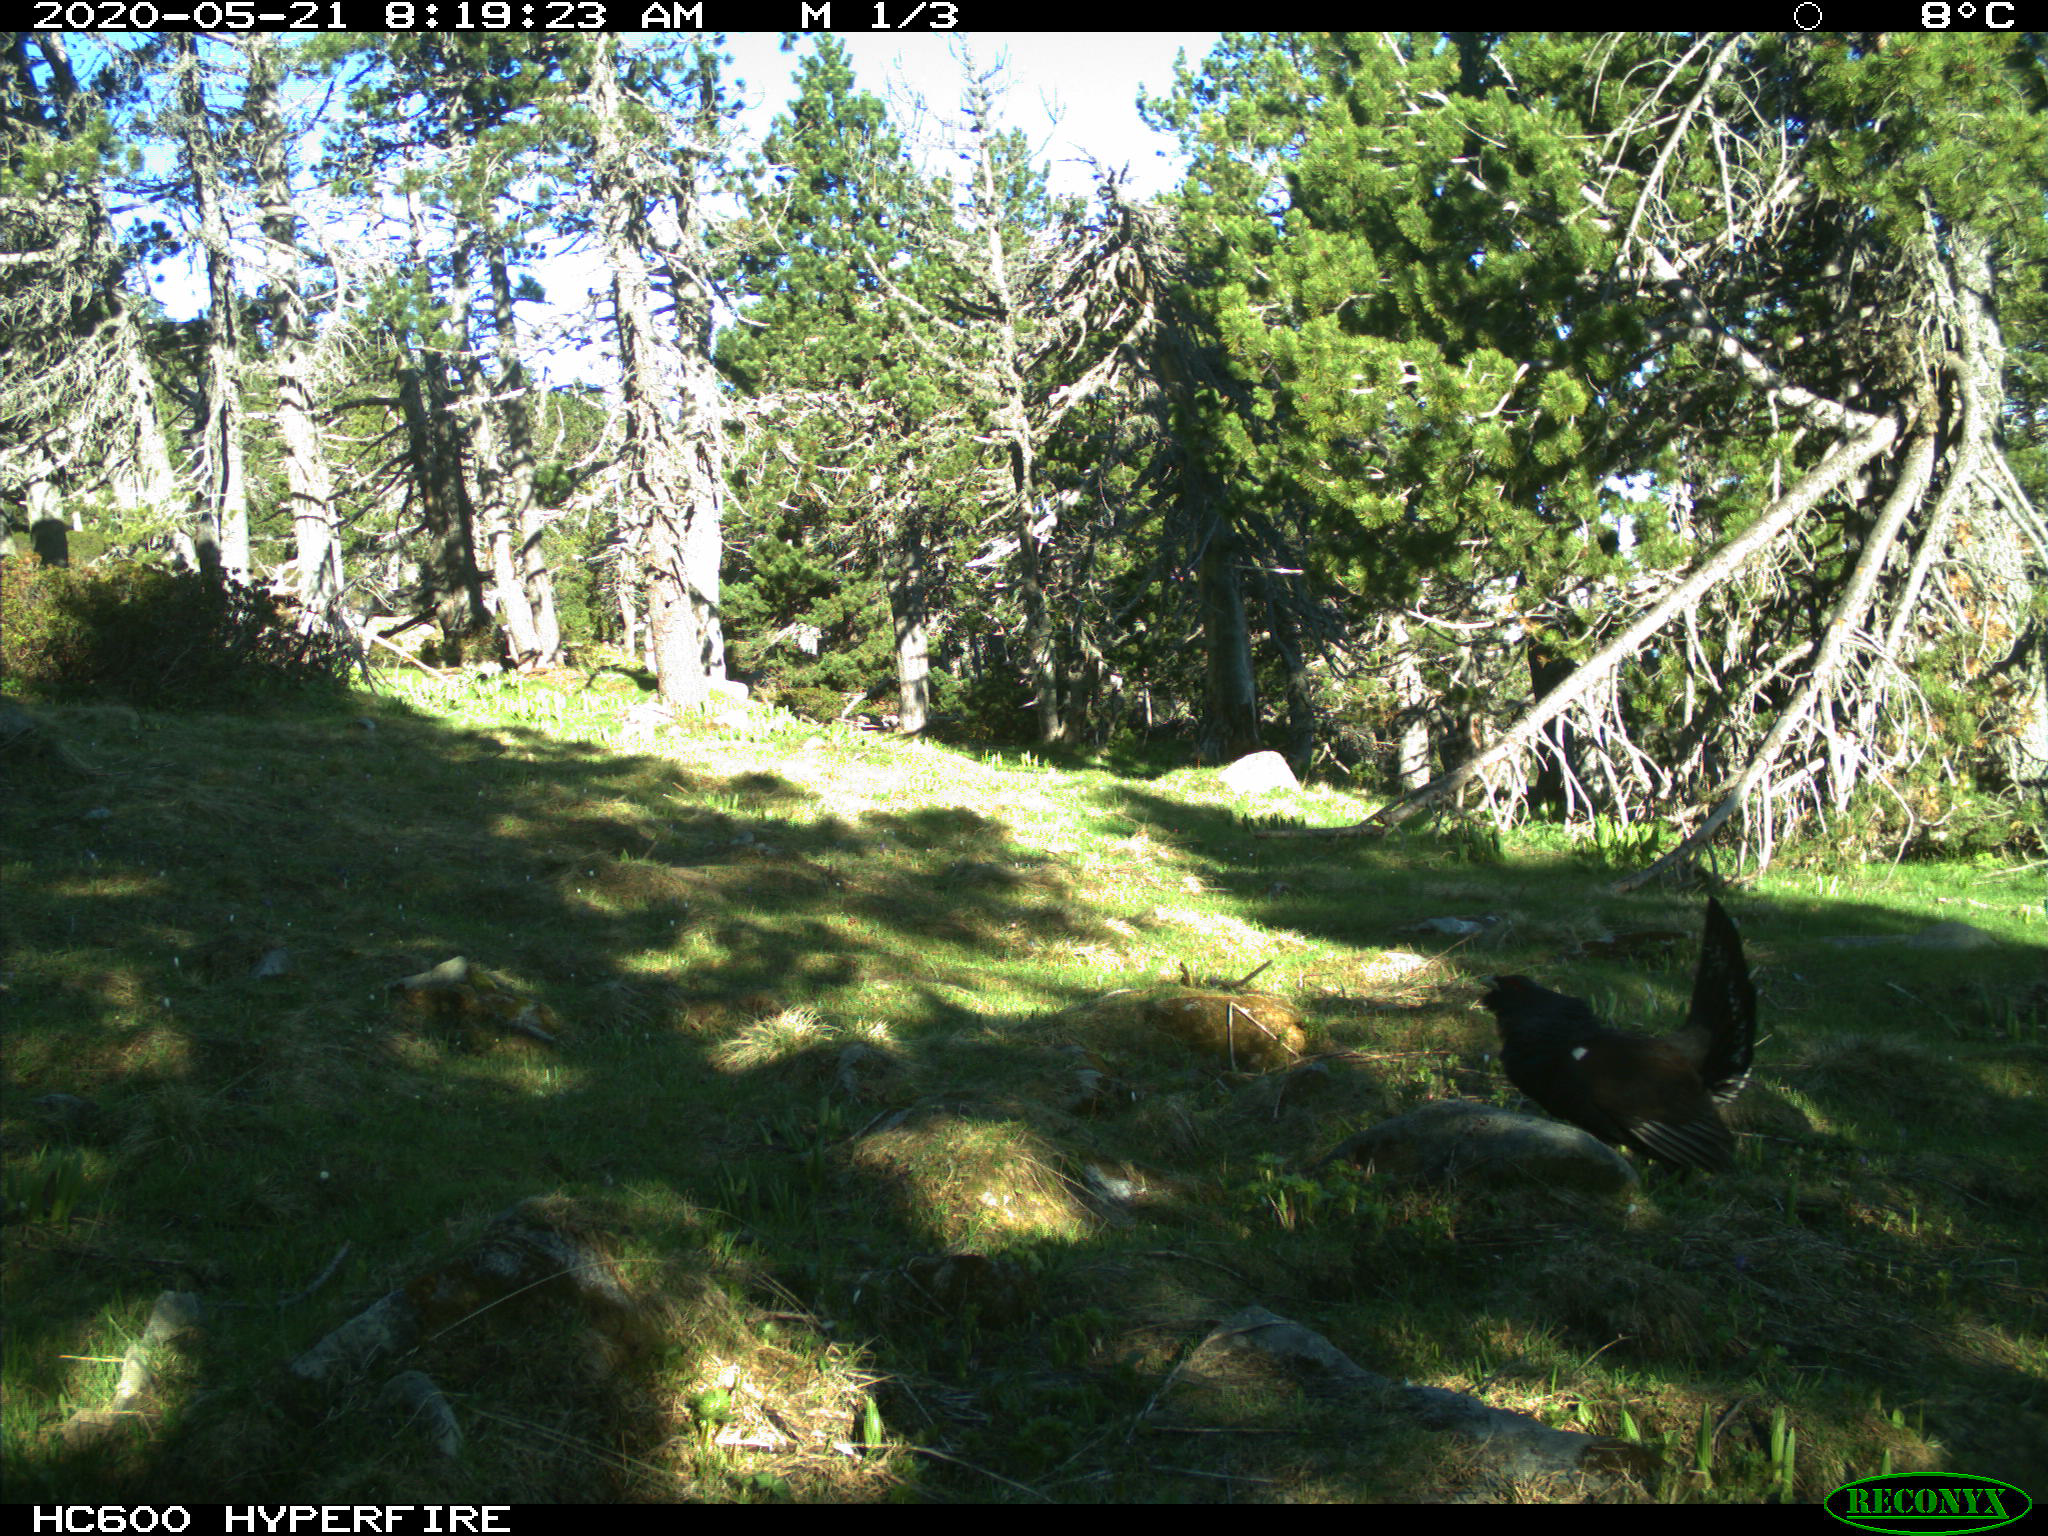

In [45]:
img = kpi.load_img(data_dir+'train/presence/presence_t_0001.jpg')  
img

The function `img_to_array` generates an `array numpy` from a  PIL image.

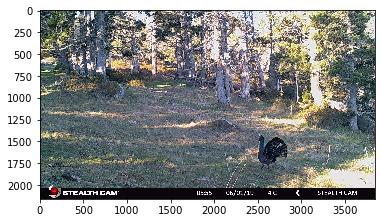

In [4]:
x = kpi.img_to_array(img)  
plt.imshow(x/255, interpolation='nearest')
plt.show()


In [7]:
# on réduit la taille, les performances sont inchangées. On peut peut etre réduire encore

X_train=[]
Y_train=[]

for f in os.listdir("data/train/absence"):
    if f.endswith(".JPG") or f.endswith(".jpg"):
        img = kpi.load_img("data/train/absence/"+f)
        x = kpi.img_to_array(img) 
        x_resize = x.resize(50,100,3)
        x_flatten = x.reshape((50*100*3))/255
        X_train.append(x_flatten)
        Y_train.append("A")
        continue
    else:
        continue

for f in os.listdir("data/train/presence"):
    if f.endswith(".JPG") or f.endswith(".jpg"):
        img = kpi.load_img("data/train/presence/"+f)
        x = kpi.img_to_array(img) 
        x_resize = x.resize(50,100,3)
        x_flatten = x.reshape((50*100*3))/255
        X_train.append(x_flatten)
        Y_train.append("P")
        continue
    else:
        continue
    
    
    

In [8]:
len(X_train)

618

In [9]:
labels=["A","P"]

In [10]:
X_val=[]
Y_val=[]

for f in os.listdir("data/validation/absence"):
    if f.endswith(".JPG") or f.endswith(".jpg"):
        img = kpi.load_img("data/validation/absence/"+f)
        x = kpi.img_to_array(img) 
        x_resize = x.resize(50,100,3)
        x_flatten = x.reshape((50*100*3))/255
        X_val.append(x_flatten)
        Y_val.append("A")
        continue
    else:
        continue

for f in os.listdir("data/validation/presence"):
    if f.endswith(".JPG") or f.endswith(".jpg"):
        img = kpi.load_img("data/validation/presence/"+f)
        x = kpi.img_to_array(img) 
        x_resize = x.resize(50,100,3)
        x_flatten = x.reshape((50*100*3))/255
        X_val.append(x_flatten)
        Y_val.append("P")
        continue
    else:
        continue
    
    

In [35]:
nfeatures=50*100*3
#taille des vecteurs représentant les images

# Support vector Classifier (SVM)

In [36]:
# avec le noyau sigmoid (c'est celui qui donne les meilleurs résultats , nous avons aussi essayé 'linear', 'rbf')
from sklearn.svm import SVC
ts = time.time()
method = SVC(kernel='sigmoid',gamma=1/nfeatures,C=15)
#method = SVC(kernel='sigmoid',gamma=0.0001,C=6)
method.fit(X_train,Y_train)
score = method.score(X_train, Y_train)
ychap = method.predict(X_train)
te = time.time()


In [37]:

labels=["A","P"]
Y_train=pd.Categorical(Y_train)

print("Score sur l'échantillon d'apprentissage : %f, time running : %d secondes" %(score, te-ts))
pd.DataFrame(confusion_matrix(ychap,Y_train), index = labels, columns=labels)

Score sur l'échantillon d'apprentissage : 0.907767, time running : 2 secondes


A    P
A  437   35
P   22  124

In [38]:
len(X_val)


366

In [39]:
print(X_val[1])

[0.54901963 0.65882355 0.6745098  ... 0.3019608  0.29411766 0.3137255 ]


In [40]:
# performance sur l'échantillon  de validation
scoreval = method.score(X_val, Y_val)

In [41]:

ypred = method.predict(X_val)

print("Score  en validation : %f" %scoreval)
pd.DataFrame(confusion_matrix(ypred,Y_val), index = labels, columns=labels)

Score  en validation : 0.751366


A   P
A  248   9
P   82  27

In [14]:
method.decision_function(X_val)
# les valeurs négatives correspondent à une prédition par "A" (absence), positive par "P" (présence)

array([-0.18025353, -0.88395033, -1.49731881, -1.55897578, -0.29156802,
       -0.49674725, -0.09223348, -0.2500022 ,  1.26394133, -1.54412649,
       -1.52031397,  1.28623383, -0.21231044, -0.10618754, -0.45355432,
       -0.27242064, -1.5353854 , -1.50720322, -0.82713223, -0.12631745,
       -0.36801609, -0.12822616,  0.21254882, -2.11885524, -1.50281221,
       -0.60353085, -0.54201427, -0.32653479,  0.46932538, -0.28695042,
        0.48874656,  0.71816473,  1.3290275 , -1.55048868, -0.32077745,
       -0.01862424, -0.21948293, -0.53188273, -0.6076639 ,  2.03795277,
       -2.07447079,  0.25765071, -0.11757996, -0.41042654, -3.03118315,
       -2.90738207, -3.03556257, -0.48521184, -0.3396529 , -0.81068716,
       -0.57803834, -1.84339768, -0.78719585, -1.51298734, -0.48380475,
       -0.58844671, -0.15717641,  0.42886289,  2.29423252,  0.85129605,
       -1.07740599,  0.82470507,  2.2958027 ,  0.53104466, -0.29181489,
       -0.306688  , -0.37648669,  1.66412536, -0.50369492, -0.34

Formula for SVM  classifier : 

$$ \hat{f}(x) = "A" \mbox{ if } \sum_{X_i support\  vector} \alpha_i k(X_i, x) + \beta \geq 0 $$
$$  \hat{f}(x) = "P"  \mbox{ if } \sum_{X_i support\ vector} \alpha_i k(X_i, x) + \beta  < 0, $$

with : 
* $\beta=$ method.intercept_
* the $\alpha_i$'s : method.dual_coef_
* the $X_i$'s : method.support_vectors_
* $k$ : the 'sigmoid'kermel
$$k(x,y)=\tanh(\gamma \langle x, y\rangle) $$

où $\gamma =$ 1/nfeatures $.

In [16]:
print(method.intercept_)

[-1.87505876]


In [27]:
print(method.classes_)

['A' 'P']


In [17]:
print(method.dual_coef_)

[[ -9.83298808 -15.         -15.         -15.         -15.
   -4.20736547 -15.         -15.         -15.         -15.
  -15.         -15.          -2.63253569 -15.         -15.
  -15.         -15.          -8.81964904 -15.         -15.
  -15.         -15.         -15.         -15.         -15.
  -13.6294147  -15.         -15.         -15.          -1.22910181
  -15.         -15.         -15.         -15.          -3.4641462
  -15.         -15.         -10.57644545 -15.         -15.
  -15.         -15.         -15.         -15.         -15.
  -15.         -15.         -15.          -4.79418603 -15.
  -15.         -15.         -15.          -9.06264716 -15.
  -15.         -15.         -15.          -3.9872768  -15.
  -15.         -15.         -15.         -15.         -15.
  -15.         -15.         -15.         -15.         -15.
  -15.         -15.         -15.         -15.         -15.
  -15.         -15.         -15.          -0.74394536 -15.
  -15.         -15.         -15.         

In [18]:
print(method.support_vectors_)

[[0.16862746 0.16862746 0.16862746 ... 0.20392157 0.20392157 0.20392157]
 [0.3882353  0.3882353  0.3882353  ... 0.41960785 0.41960785 0.41960785]
 [0.47843137 0.47843137 0.47843137 ... 0.94509804 0.94509804 0.94509804]
 ...
 [0.07843138 0.20392157 0.14509805 ... 0.11764706 0.20392157 0.24705882]
 [0.42745098 0.42745098 0.42745098 ... 0.60000002 0.60000002 0.60000002]
 [0.41568628 0.41568628 0.41568628 ... 0.58039218 0.58039218 0.58039218]]


In [19]:
SV=method.support_vectors_
SV.shape

(225, 15000)

In [20]:
225*15000


3375000

# Logistic Regression 

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
# Optimisation du paramètre de pénalisation
# grille de valeurs
param=[{"C":[1,2,3,4]}]
logit = GridSearchCV(LogisticRegression(penalty="l1",solver="liblinear"), param,cv=5,n_jobs=-1)
logitOpt=logit.fit(X_train, Y_train)  # GridSearchCV est lui même un estimateur
# paramètre optimal
logitOpt.best_params_["C"]
print("Meilleur score = %f, Meilleur paramètre = %s" % (logitOpt.best_score_,logitOpt.best_params_))

Meilleur score = 0.914306, Meilleur paramètre = {'C': 4}


In [23]:
# performance sur l'échantillon  train
logitOpt.score(X_train, Y_train)
y_chap = logitOpt.predict(X_train)
pd.DataFrame(confusion_matrix(ychap,Y_train), index = labels, columns=labels)

A    P
A  437   35
P   22  124

In [24]:
# performance sur l'échantillon  de validation
logitOpt.score(X_val, Y_val)


0.6502732240437158

In [48]:

ypredlogit = logitOpt.predict(X_val)
# matrice de confusion


ypredlogit=pd.Categorical(ypredlogit)

Y_val=pd.Categorical(Y_val)


pd.DataFrame(confusion_matrix(ypredlogit,Y_val), index = labels, columns=labels)


A   P
A  210   6
P  120  30

# Decision tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(5,10))}]
tree= GridSearchCV(DecisionTreeClassifier(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(X_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (treeOpt.best_score_,treeOpt.best_params_))

Meilleur score = 0.885219, Meilleur paramètre = {'max_depth': 5}


In [50]:

ychap = treeOpt.predict(X_train)

pd.DataFrame(confusion_matrix(ychap,Y_train), index = labels, columns=labels)

A    P
A  459    6
P    0  153

In [219]:
# performance sur l'échantillon  de validation
treeOpt.score(X_val,Y_val)

0.7349726775956285

In [221]:

ypred = treeOpt.predict(X_val)

pd.DataFrame(confusion_matrix(ypred,Y_val), index = labels, columns=labels)

A   P
A  242   9
P   88  27

# Random forests

In [222]:
from sklearn.ensemble import RandomForestClassifier 
# définition des paramètres
forest = RandomForestClassifier(n_estimators=200, 
   criterion='gini', max_depth=None,
   min_samples_split=2, min_samples_leaf=1, 
   max_features='auto', max_leaf_nodes=None,
   bootstrap=True, oob_score=True,class_weight='balanced')
# apprentissage
rfFit = forest.fit(X_train,Y_train)
print(rfFit.oob_score_)

0.9239482200647249


In [223]:

ychap = rfFit.predict(X_train)

pd.DataFrame(confusion_matrix(ychap,Y_train), index = labels, columns=labels)

A    P
A  459    0
P    0  159

In [224]:
# performance sur l'échantillon  de validation
rfFit.score(X_val,Y_val)

0.7896174863387978

In [225]:

ypred = rfFit.predict(X_val)

pd.DataFrame(confusion_matrix(ypred,Y_val), index = labels, columns=labels)

A   P
A  257   4
P   73  32

# Multilayer perceptron

In [21]:
from sklearn.neural_network import MLPClassifier

In [32]:

# Perceptron à une couche cachée. On optimise le nombre de neurones de la couche cachée par validation croisée
param_grid=[{"hidden_layer_sizes":list([(50,),(100,),(150,)])}]
nnet= GridSearchCV(MLPClassifier(max_iter=500),param_grid,cv=10,n_jobs=-1)
nnetOpt=nnet.fit(X_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" %  (nnetOpt.best_score_,nnetOpt.best_params_))

Meilleur score = 0.896325, Meilleur paramètre = {'hidden_layer_sizes': (150,)}


In [33]:
nnetOpt.score(X_train,Y_train)

0.970873786407767

In [34]:


ychap = nnetOpt.predict(X_train)

pd.DataFrame(confusion_matrix(ychap,Y_train), index = labels, columns=labels)


A    P
A  453   12
P    6  147

In [35]:
# performance sur l'échantillon  de validation
nnetOpt.score(X_val,Y_val)


0.680327868852459

In [36]:


ypred = nnetOpt.predict(X_val)

pd.DataFrame(confusion_matrix(ypred,Y_val), index = labels, columns=labels)


A   P
A  220   7
P  110  29

# Conclusion : 
Les meilleurs résultats sont obtenus avec les SVM avec le noyau sigmoid ou avec les forêtes aléatoires. Néanmoins, ces performances (de l'ordre de 75 % de bons classements sur l'échantillon de validation) sont nettement moins bonnes que celles obtenues avec les réseaux de neurones convolutionnels qui, s'ils s'appuient sur des réseaux préentrainés, ne font quasiment plus d'erreur. 